In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [7]:
X = 2 * np.random.rand(100,1)
y= 4 + 3 * X + np.random.rand(100,1)


# y=4+3X

Text(0, 0.5, '$y$')

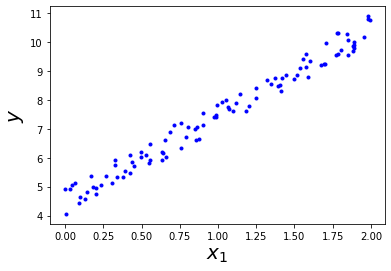

In [4]:
plt.plot(X,y,'b.')
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$y$",fontsize=20)

In [8]:
X_b=np.c_[np.ones((100,1)),X] # theta 0 is multiplied by 1


In [18]:
theta_best=np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #calculate theta not and theta one using cost function
theta_best

array([[4.53611599],
       [2.98325325]])

In [19]:
X_new=np.array([[0],[2]])
X_new

array([[0],
       [2]])

In [9]:
X_new_b=np.c_[np.ones((2,1)),X_new]
X_new_b

array([[1., 0.],
       [1., 2.]])

In [30]:
y_predict=X_new_b.dot(theta_best)
y_predict

array([[ 4.54480523],
       [10.48387498]])

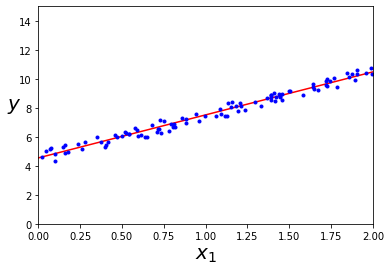

In [31]:
plt.plot(X_new,y_predict,'r-')
plt.plot(X,y,'b.')
plt.xlabel("$x_1$",fontsize=20)
plt.ylabel("$y$",fontsize=20,rotation=0)
plt.axis([0,2,0,15])
plt.show()

In [11]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()


In [12]:
lin_reg.fit(X,y)
lin_reg.intercept_,lin_reg.coef_

(array([4.4897566]), array([[2.99874415]]))

In [13]:
lin_reg.predict(X_new)

array([[ 4.4897566],
       [10.4872449]])

# Batch Gradient Descent

In [2]:
eta = 0.1 # learning rate
n_iterations = 1000 # Number of iterations  after which algorithm stops
m = 100 # Number of elements in training  dataset


In [5]:
theta = np.random.randn(2,1) # Random  initialization of model parameters


In [9]:
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients #Determine the size of the downhill step

In [10]:
theta

array([[4.45690964],
       [3.02772251]])

# Stochastic Gradient Descent

In [11]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

In [12]:
def learning_schedule(t):
    return t0 / (t + t1)

In [13]:
theta = np.random.randn(2,1) # random initialization

In [14]:
for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

In [15]:
theta

array([[4.44381786],
       [3.01763425]])

# SGD with Linear Regression

In [16]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())
#maximum 1,000 epochs or until the loss drops by less than 0.001 during one epoch (max_iter=1000, tol=1e-3).

SGDRegressor(eta0=0.1, penalty=None)

In [17]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.4248891]), array([3.02418571]))